# **Exploratory Data Analysis**

The dataset is divided into two parts, train and test, because train data contains a greater number of samples and therefore provides a more accurate representation of the actual population. Consequently, EDA has been conducted for the same

---



## **1. Importing the standarad libraries**

In [17]:
import pandas as pd #for data loading
import numpy as np #for numerical processing
# plotting and visualizaion libraries
import matplotlib.pyplot as plt
import seaborn as sns
#importing the libraries for Data Preprocessing
from sklearn.model_selection import train_test_split # For Spliiting if validation split required

import re # For String Matching

# For Machine Learning
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#saving and laoding model libraries
import pickle

import warnings 
warnings.filterwarnings("ignore")

## **2. Loading the dataset Train split**

In [18]:
# Loading the dataset
dataset_path="/content/drive/MyDrive/Credit_Card/train.csv" #The path to train dataset file
train_df=pd.read_csv(dataset_path,low_memory=False)#Columns (26) have mixed types.Therefor, either we specify dtype option on import or set low_memory=False.

## **3. Data type exploration**

In [19]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

So, there are a total of 27 columns in the dataset with object, integer, and float data types

## **4. Data statistical exploration**



In [20]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


The statistical data exploration for the entire train dataset is provided for the numerical features or columns of the dataset. It can be seen that the data is not normalized. Moreover, the less count is indicating the absence of values and so NUll appearnce in the columns

## **5. Data Duplicate exploration and study**

In [21]:
mask_duplicate=train_df.duplicated()
print(mask_duplicate.sum())

0


It can be seen that all the values are different and no duplicated values

## **6. Data Deatiled exploration and study**

### **Count based Important Feature Analysis**

As, the numbers of features are large so exploring the countplot for some important features

/content/drive/MyDrive/Credit_Card/Images_EDA


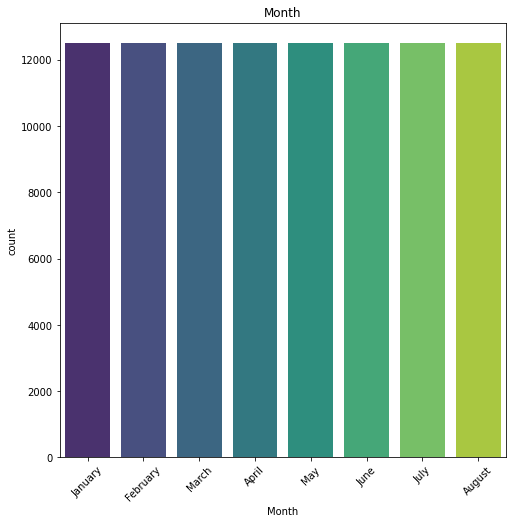

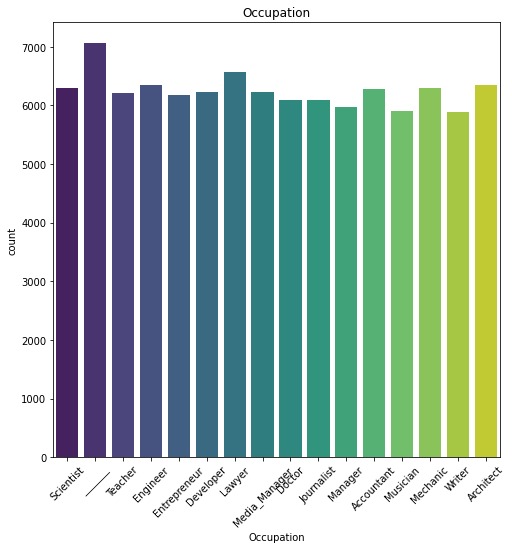

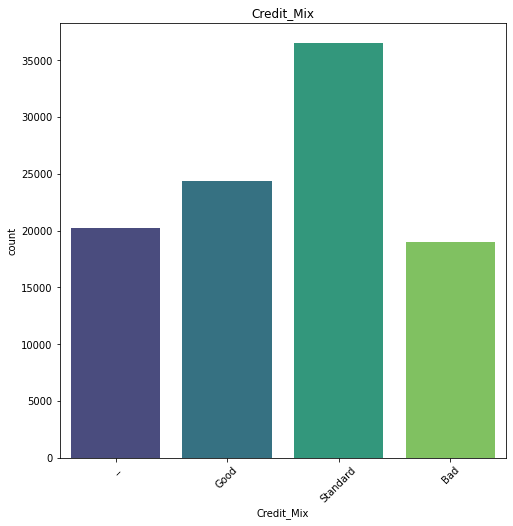

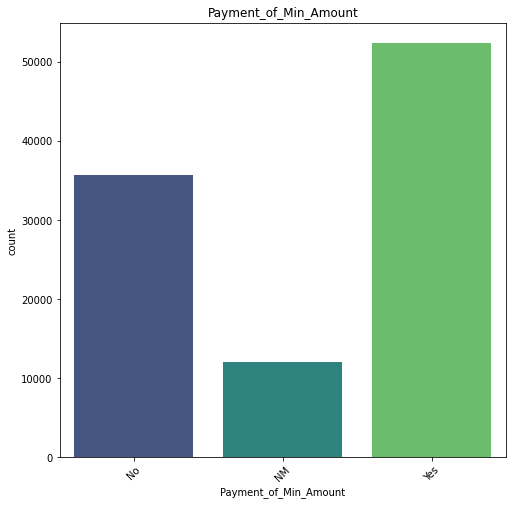

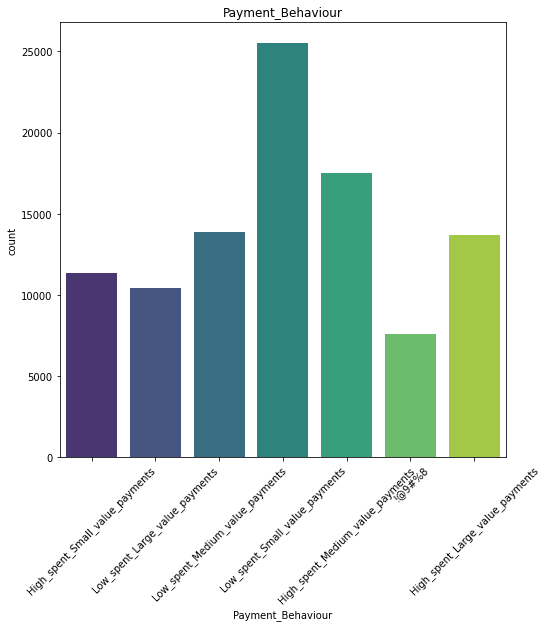

In [22]:
col=['Month','Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
%cd /content/drive/MyDrive/Credit_Card/Images_EDA/
# Plotting all columns
for c in col:
  plt.figure(figsize=(8,8))
  sns.countplot(x=train_df[c],palette='viridis')
  plt.title(c)
  plt.xticks(rotation=45);
  plt.savefig(c,bbox_inches='tight')
  plt.show()

### **Multivarate Analysis**

Multivariate analysis is a method for simultaneously identifying patterns and relationships between multiple variables. It allows us to predict how a change in one variable will affect other variables. This provides multivariate analysis with a significant advantage over other types of analysis.

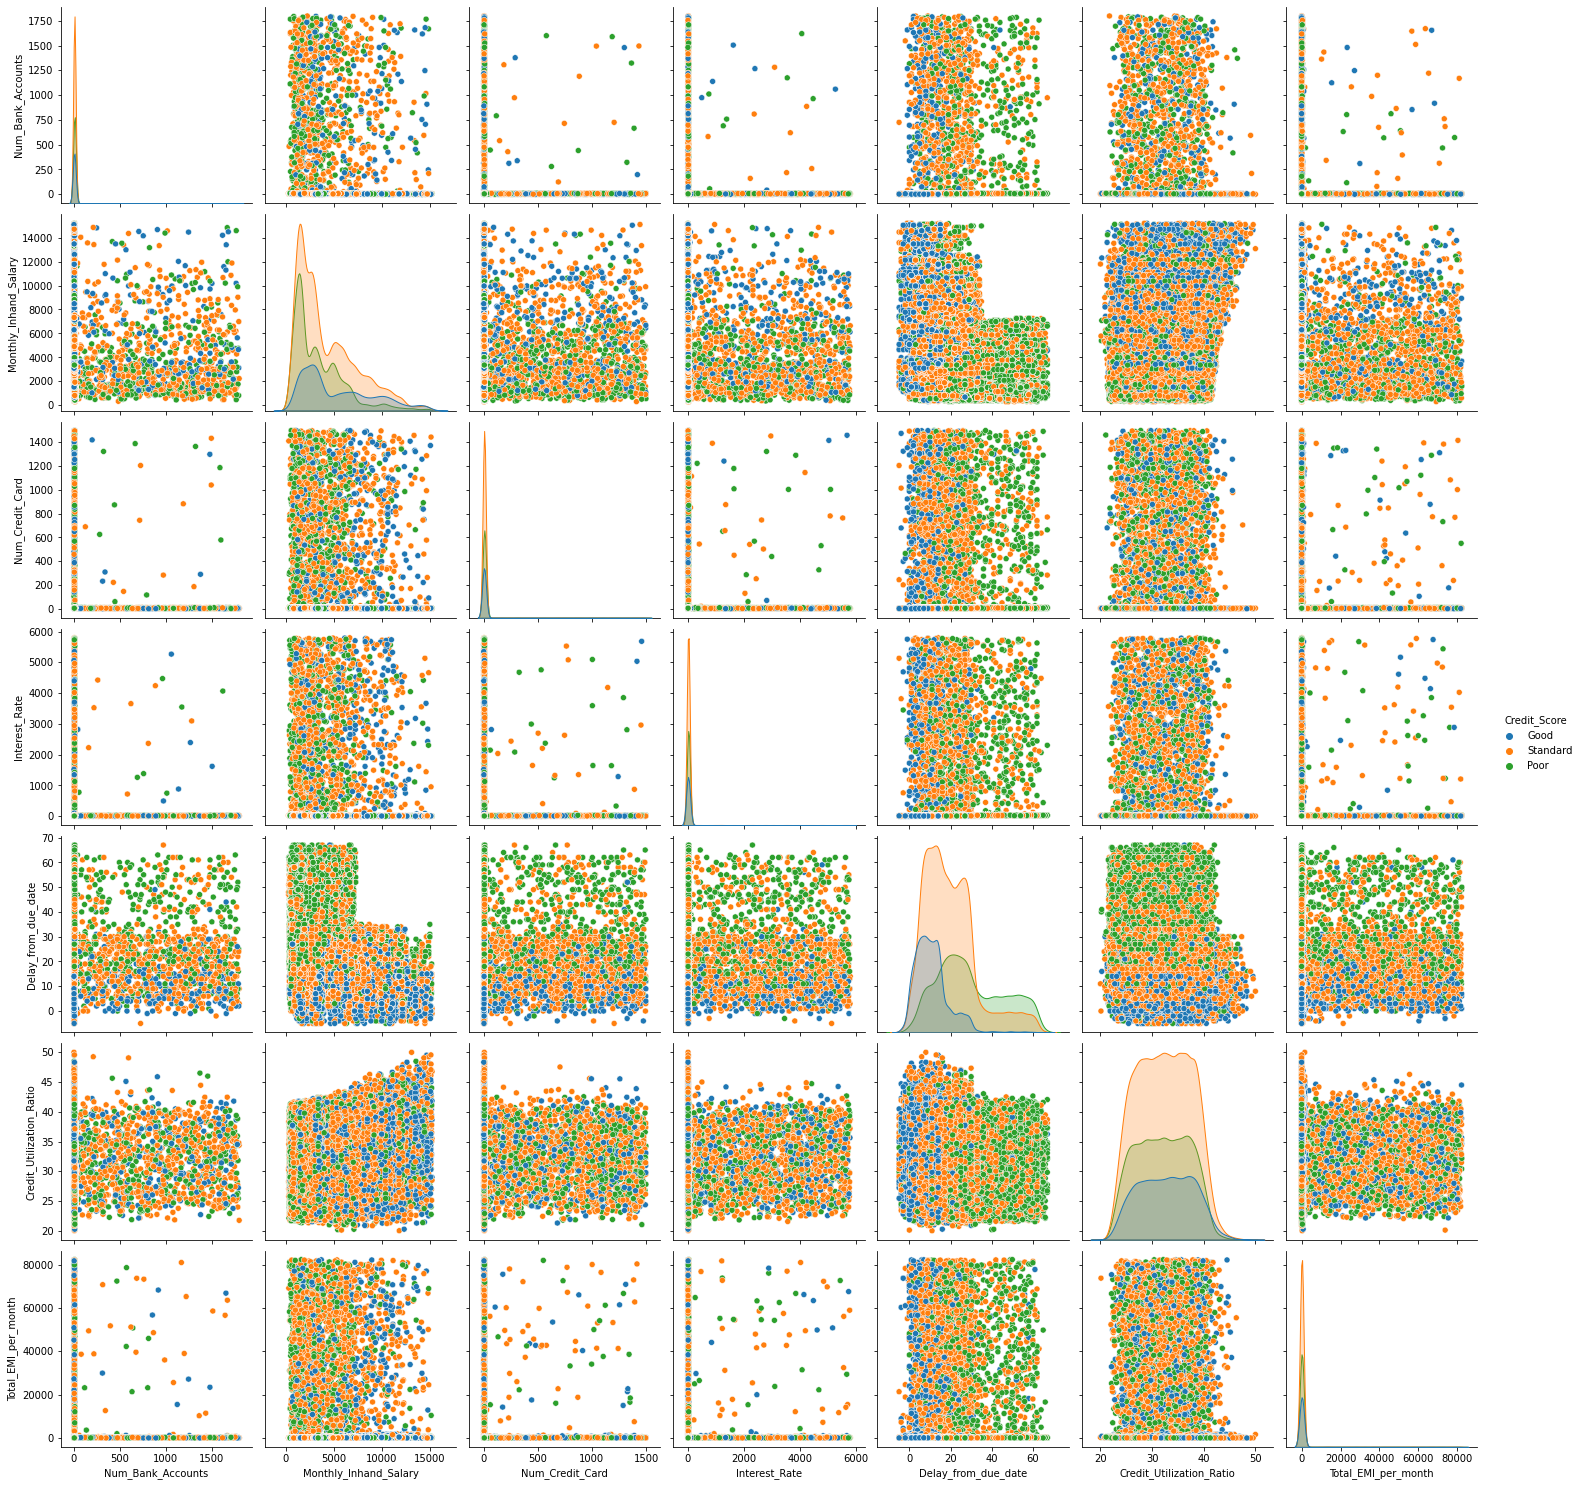

In [ ]:
selected_col=['Num_Bank_Accounts','Monthly_Inhand_Salary','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Credit_Utilization_Ratio','Total_EMI_per_month','Credit_Score']
new_df=train_df[selected_col]
sns.pairplot(new_df, hue="Credit_Score", height=3)
plt.show()

# **Data Cleaning**

## 1. Removing unuseful Columns

In [23]:
#train_data
del train_df['ID'] # Identification Number
del train_df['Name'] # Name of client No a useful info
del train_df['SSN'] # SSN (social security number of a person)

## 2. Removing the different data types in a features issue

As, each col or feature must have one datatype and the same must be correct suppose age must be a number therefore, in order to avoid the conflict the columns mentioned below are converted in to numerical columns
1. 'Age'
2. 'Annual_Income'
3. 'Num_of_Loan'
4. 'Num_of_Delayed_Payment'
5. 'Changed_Credit_Limit'
6. 'Amount_invested_monthly'
7. 'Outstanding_Debt' 
8. 'Monthly_Balance'

In [24]:
# Repalcing the - with " "
def col_convert(num):
    try : 
        return float(num.replace("_",""))# Blank
    except :
        return np.nan#nan value otherwise
def data_transfer(df,col):
  for c in col:
      df[c]=df[c].apply(col_convert)
  return df

In [25]:

new_col=['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']
clean_train=data_transfer(train_df,new_col)

## 3. Converting and cleaning the Payment_of_Min_Amount and Payment_Behaviour

In [26]:
clean_train['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [27]:
clean_train['Payment_Behaviour']= clean_train['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [28]:
# Transforming the Credit_History_Age as two much info for categorical to dummies so converting in float 

def convert_History_Age(age):
    try : 
        Years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        Month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return Years*12 + Month
    except :
        return np.nan

In [29]:
clean_train['Credit_History_Age'] = clean_train['Credit_History_Age'].apply(convert_History_Age)

In [30]:
# Transforming the Type_of_Loan to reduce categorical effect so neglecting the same
del clean_train['Type_of_Loan']


## 4. Changing the unkown ------ in occupation

In [31]:
def tranfer_occupation(df):
  #Replacing the string id CUS_0xb891
  list_string=["CUS_0xd40","CUS_0xb891"]
  for l in list_string:
    temp = df[df['Customer_ID'] == l]['Occupation'].mode()[0]
    df[df['Customer_ID'] == l].replace("_______",temp)

  for ID in df[df['Occupation'] == "_______"]['Customer_ID'] : 
    temp = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",temp)
  
  df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])

  return df

In [32]:
clean_train=tranfer_occupation(clean_train)

## 5. Converting Customer_ID in float

In [33]:
# For Converting Customer_ID in float
IDs = 1 
for ID in clean_train['Customer_ID'].unique() :
    clean_train['Customer_ID'] = clean_train['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [34]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

# **Missing Value Handling**

## 1. Importing the KNN imputer to replcae the missing values with optimal value for numerical columns 

In [35]:
from sklearn.impute import KNNImputer,SimpleImputer
imputer = KNNImputer(n_neighbors=1)# two neighbor base

In [36]:
# Selecting all the numnerical colummns
num_col = list((clean_train.select_dtypes(exclude='object').columns[1:]))
print(num_col)

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [37]:
for c in num_col:
    imputer.fit(clean_train[['Customer_ID',c]])
    clean_train[['Customer_ID',c]] = imputer.transform(clean_train[['Customer_ID',c]])

## 2. Importing the Most Frequent imputer to replcae the missing values with optimal value for object type columns 

In [38]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(clean_train[['Credit_History_Age']])
clean_train[['Credit_History_Age']] = imputer.transform(clean_train[['Credit_History_Age']])

In [39]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(clean_train[['Payment_Behaviour']])
clean_train[['Payment_Behaviour']] = imputer.transform(clean_train[['Payment_Behaviour']])

In [40]:
clean_train.select_dtypes(include="object")

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,_,No,High_spent_Small_value_payments,Good
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...
99995,April,Mechanic,_,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,_,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


So, all the missing values had been treated

# **Outlier Handling**

In [41]:
!pip install datasist
from datasist.structdata import detect_outliers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 6.6 MB/s 
     |████████████████████████████████| 1.6 MB 44.5 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 


In [42]:
## replace Outliers with median 
for c in num_col :
    outliers_indx = detect_outliers(clean_train,0,[c])
    median = clean_train[c].median()
    clean_train[c].iloc[outliers_indx] = median

In [43]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [44]:
# Dropping the Customer Id column
del clean_train['Customer_ID']

## **Data Preprocessing**

## **Converting Categorical Variable using encoding**




In [45]:
# The Credit_Score Conversion to classes
class_data = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

clean_train['Credit_Score'] = clean_train['Credit_Score'].map(class_data)

In [46]:
clean_train['Credit_Score'].value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

In [47]:
clean_train= pd.get_dummies(clean_train,drop_first=True)

In [48]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

# Checking for the total classes and assocaited samples

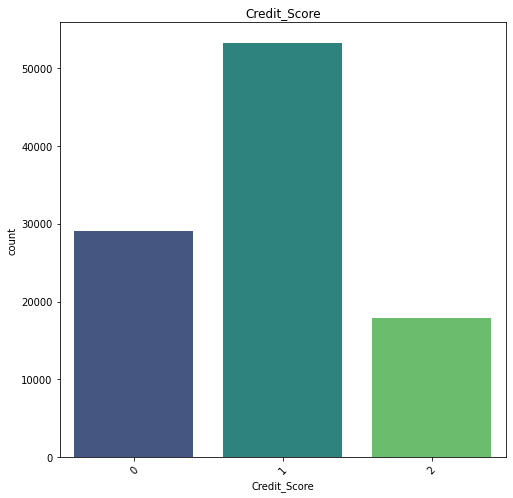

In [49]:
# Looking for class balance
plt.figure(figsize=(8,8))
sns.countplot(x=clean_train['Credit_Score'],palette='viridis')
plt.title('Credit_Score')
plt.xticks(rotation=45)
plt.savefig(c,bbox_inches='tight')
plt.show()

#

So, the dataset is imbalanced and so we need to create oversmapling based values for the better classification. For this the famous SMOTE is used

Uncommment the below cell if the clean data is to be stored

In [ ]:
# %cd /content/drive/MyDrive/Credit_Card/
# clean_train.to_csv("Clean_train.csv")

/content/drive/MyDrive/Credit_Card


# **Loading the save clean dataset**

If loading of the clean data is required uncommnet below cell

In [3]:
# # Loading the dataset
# train_dataset_path="/content/drive/MyDrive/Credit_Card/Clean_train.csv" #The path to train dataset file
# clean_train=pd.read_csv(train_dataset_path,low_memory=False)#Columns (26) have mixed types.Therefore, either we specify dtype option on import or set low_memory=False.
#del clean_train['Unnamed: 0']

# **SMOTE for converting the dataset from imbalance class to balance class problem**

In [6]:
Y_train=clean_train['Credit_Score'] 
X_train= clean_train.drop("Credit_Score",axis=1).values

In [7]:
from imblearn.over_sampling import SMOTE
over_algo = SMOTE()
X_data_train, Y_data_train = over_algo.fit_resample(X_train, Y_train)

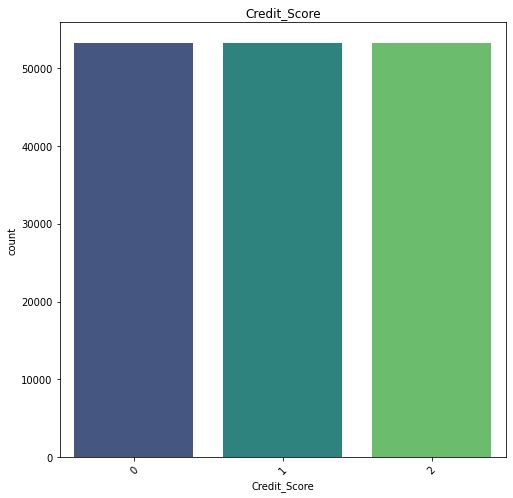

In [8]:
# Looking for class balance
plt.figure(figsize=(8,8))
sns.countplot(x=Y_data_train,palette='viridis')
plt.title('Credit_Score')
plt.xticks(rotation=45)
plt.savefig('Credit_Score',bbox_inches='tight')
plt.show()

# Writing a preprocessing Function

In [9]:
def pre_process_input(df):
  imputer = KNNImputer(n_neighbors=1)# two neighbor base
  #test_data
  del df['ID'] # Identification Number
  del df['Name'] # Name of client No a useful info
  del df['SSN'] # SSN (social security number of a person)

  new_col=['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']
  clean_df=data_transfer(df,new_col)

  clean_df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
  clean_df['Payment_Behaviour']= clean_df['Payment_Behaviour'].replace("!@9#%8",np.nan)
  
  
  clean_df['Credit_History_Age'] = clean_df['Credit_History_Age'].apply(convert_History_Age)
  del clean_df['Type_of_Loan']
  
  clean_df=tranfer_occupation(clean_df)

  # For Converting Customer_ID in float
  IDs = 1 
  for ID in clean_df['Customer_ID'].unique() :
      clean_df['Customer_ID'] = clean_df['Customer_ID'].replace(ID,IDs)
      IDs += 1 

  # Selecting all the numnerical colummns
  num_col = list((clean_df.select_dtypes(exclude='object').columns[1:]))
  print(num_col)

  for c in num_col:
    imputer.fit(clean_df[['Customer_ID',c]])
    clean_df[['Customer_ID',c]] = imputer.transform(clean_df[['Customer_ID',c]])
  
  imputer = SimpleImputer(strategy="most_frequent")
  imputer.fit(clean_df[['Credit_History_Age']])
  clean_df[['Credit_History_Age']] = imputer.transform(clean_df[['Credit_History_Age']])
  
  imputer = SimpleImputer(strategy="most_frequent")
  imputer.fit(clean_df[['Payment_Behaviour']])
  clean_df[['Payment_Behaviour']] = imputer.transform(clean_df[['Payment_Behaviour']])

  ## replace Outliers with median 
  for c in num_col :
      outliers_indx = detect_outliers(clean_df,0,[c])
      median = clean_df[c].median()
      clean_df[c].iloc[outliers_indx] = median

  del clean_df['Customer_ID']

  # The Credit_Score Conversion to classes
  class_data = {
      "Poor":0,
      "Standard":1,
      "Good":2
  }

  clean_df['Credit_Score'] = clean_df['Credit_Score'].map(class_data)
  clean_df= pd.get_dummies(clean_df,drop_first=True)

  return clean_df

In [10]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_train, Y_data_train, test_size=0.2, random_state=42)

In [11]:
print("The shape of Train data is : ",(X_train.shape,y_train.shape))
print("The shape of Test  data is : ",(X_test.shape,y_test.shape))

The shape of Train data is :  ((127617, 47), (127617,))
The shape of Test  data is :  ((31905, 47), (31905,))


In [16]:
def test_stats(X_test,y_pred,y_proba,y_test,model):
  # Plot the confusion matrix
  fig, ax = plt.subplots(figsize=(12, 8))
  # Create the matrix
  cm = confusion_matrix(y_test, y_pred)
  cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
  cmp.plot(ax=ax)
  plt.show()
  
  #Classification Report
  print("*************    The Detailed Classification Report is as below:          ***********************")
  print(classification_report(y_test, y_pred))
  print("*************************************************************************************************")

  ## Calculate ROC_AUC
  ROC_AUC_Score=roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
  print("*************   The ROC AUC Score Using One vs All approach is as  below: ***********************")
  print("                "+str(ROC_AUC_Score)+  "                                                         ")
  print("*************************************************************************************************")


# **CART Model**

## The grid search hyper parameter tuning for Classification Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=95, random_state=42)

In [ ]:
CART=DecisionTreeClassifier(max_leaf_nodes=95, random_state=42)

In [ ]:
CART.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=95, random_state=42)

In [ ]:
y_pred=CART.predict(X_test)
y_proba=CART.predict_proba(X_test)

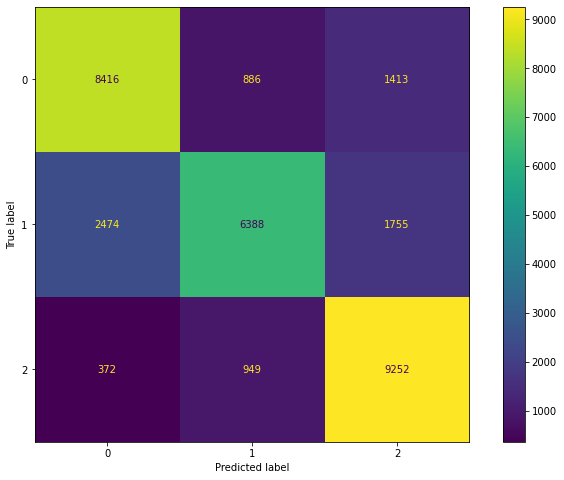

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     10715
           1       0.78      0.60      0.68     10617
           2       0.74      0.88      0.80     10573

    accuracy                           0.75     31905
   macro avg       0.76      0.75      0.75     31905
weighted avg       0.76      0.75      0.75     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.8999756182303792                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,CART)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_CART.sav'
pickle.dump(CART, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card




---



---



# **KNN with Grid Search**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters_KNN = {
    'n_neighbors': (1,5,1),
    'leaf_size': (20,30,2),
    'p': (1,2),
}
KNN=KNeighborsClassifier()
grid_search_cv = GridSearchCV(KNN, parameters_KNN, verbose=1, cv=3,scoring = 'accuracy')
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': (20, 30, 2), 'n_neighbors': (1, 5, 1),
                         'p': (1, 2)},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_cv.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)

In [ ]:
KNN=KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)

In [ ]:
y_pred=KNN.predict(X_test)
y_proba=KNN.predict_proba(X_test)

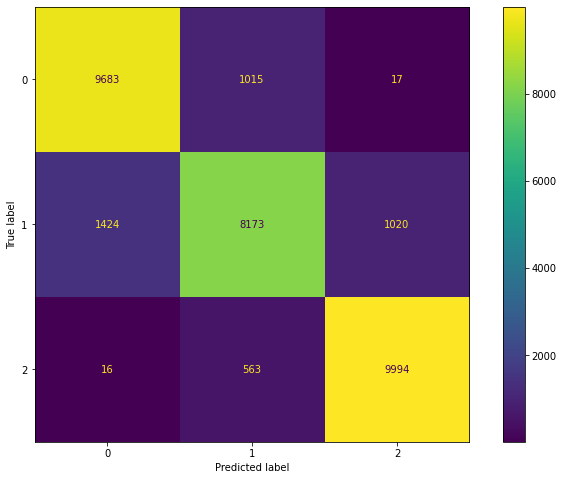

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10715
           1       0.84      0.77      0.80     10617
           2       0.91      0.95      0.93     10573

    accuracy                           0.87     31905
   macro avg       0.87      0.87      0.87     31905
weighted avg       0.87      0.87      0.87     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.9046523675549917                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,KNN)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_KNN.sav'
pickle.dump(KNN, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card


# **Random Forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [51]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred=RF.predict(X_test)
y_proba=RF.predict_proba(X_test)

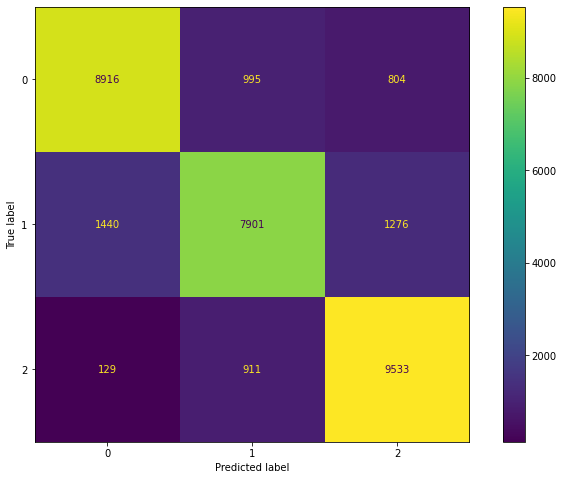

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10715
           1       0.81      0.74      0.77     10617
           2       0.82      0.90      0.86     10573

    accuracy                           0.83     31905
   macro avg       0.83      0.83      0.82     31905
weighted avg       0.83      0.83      0.82     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.9523620319495057                                                         
*************************************************************************************************


In [53]:
test_stats(X_test,y_pred,y_proba,y_test,RF)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_RF.sav'
pickle.dump(RF, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card


# **Bagging Decision Tree**

In [ ]:
from sklearn.ensemble import BaggingClassifier
BG=BaggingClassifier()

In [ ]:
BG.fit(X_train,y_train)

BaggingClassifier()

In [ ]:
y_pred=BG.predict(X_test)
y_proba=BG.predict_proba(X_test)

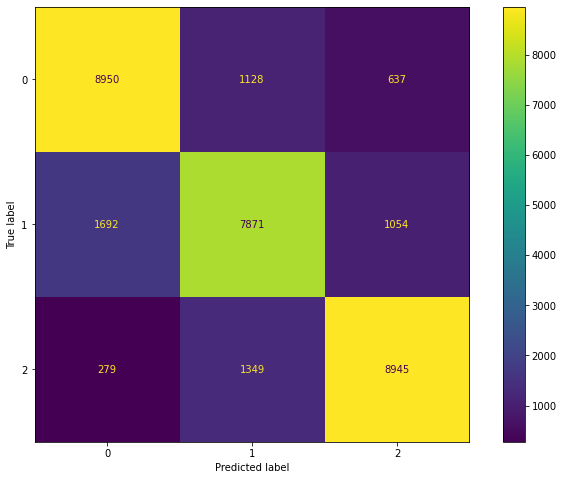

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     10715
           1       0.76      0.74      0.75     10617
           2       0.84      0.85      0.84     10573

    accuracy                           0.81     31905
   macro avg       0.81      0.81      0.81     31905
weighted avg       0.81      0.81      0.81     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.9316521418754885                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,BG)

# **SVM with Grid Search**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

SVM = SGDClassifier(max_iter=1000)
grid_search_cv = GridSearchCV(SVM, params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         'penalty': ['l2', 'l1', 'none']},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

SGDClassifier(alpha=0.01, loss='modified_huber', penalty='l1')

In [ ]:
SVM = SGDClassifier(max_iter=1000,alpha=0.01, loss='modified_huber', penalty='l1')

In [ ]:
SVM.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='modified_huber', penalty='l1')

In [ ]:
y_pred=SVM.predict(X_test)
y_proba=SVM.predict_proba(X_test)

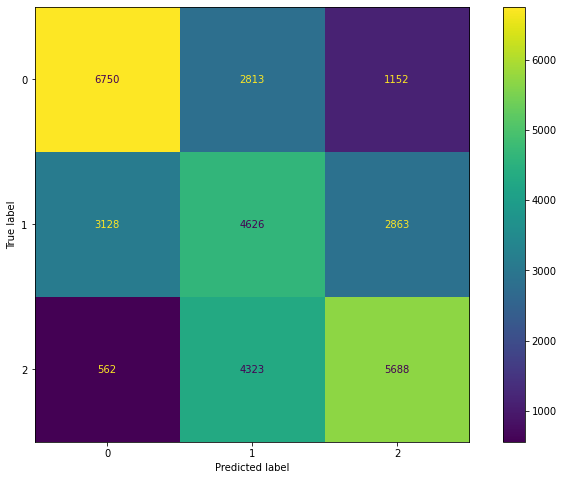

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.65      0.63      0.64     10715
           1       0.39      0.44      0.41     10617
           2       0.59      0.54      0.56     10573

    accuracy                           0.53     31905
   macro avg       0.54      0.53      0.54     31905
weighted avg       0.54      0.53      0.54     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.7181524393110698                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,SVM)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_SVM.sav'
pickle.dump(SVM, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card


# **LGBM**

In [ ]:
X_train=X_train[:100]
y_train=y_train[:100]

In [ ]:
import lightgbm as lgb

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['softmax'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }
mdl = lgb.LGBMClassifier()
grid = GridSearchCV(mdl, gridParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits
{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.01, 'max_bin': 255, 'n_estimators': 16, 'num_leaves': 6, 'objective': 'softmax', 'random_state': 500, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.6500297088532383


In [ ]:
mdl = lgb.LGBMClassifier(boosting_type='dart', 
                         colsample_bytree=0.64, 
                         learning_rate=0.01, 
                         max_bin=255, 
                         n_estimators=16, 
                         num_leaves=6, 
                         objective='softmax', 
                         random_state=500, 
                         reg_alpha=1, 
                         reg_lambda=1, 
                         subsample=0.7)

In [ ]:
mdl.fit(X_train,y_train)

LGBMClassifier(boosting_type='dart', colsample_bytree=0.64, learning_rate=0.01,
               max_bin=255, n_estimators=16, num_leaves=6, objective='softmax',
               random_state=500, reg_alpha=1, reg_lambda=1, subsample=0.7)

In [ ]:
y_pred=mdl.predict(X_test)
y_proba=mdl.predict_proba(X_test)

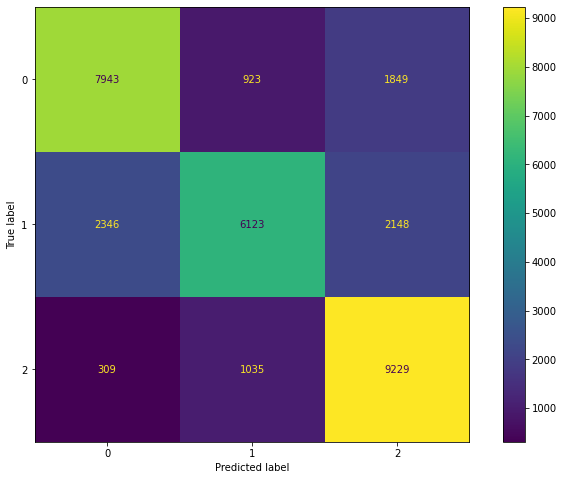

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     10715
           1       0.76      0.58      0.65     10617
           2       0.70      0.87      0.78     10573

    accuracy                           0.73     31905
   macro avg       0.73      0.73      0.73     31905
weighted avg       0.74      0.73      0.73     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.8641604615707321                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,mdl)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_LGBM.sav'
pickle.dump(mdl, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card


# **ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()

In [ ]:
ABC.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred=ABC.predict(X_test)
y_proba=ABC.predict_proba(X_test)

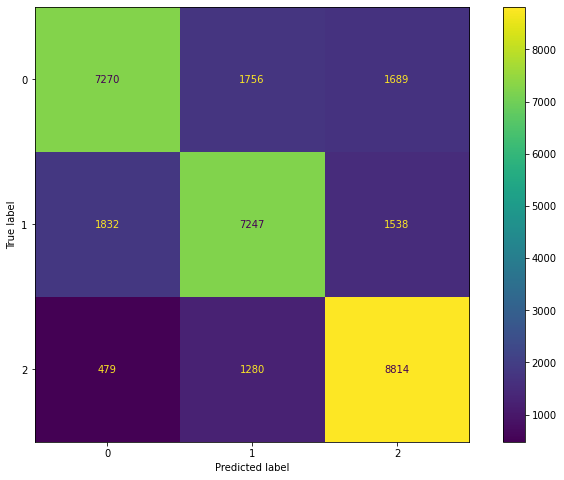

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     10715
           1       0.70      0.68      0.69     10617
           2       0.73      0.83      0.78     10573

    accuracy                           0.73     31905
   macro avg       0.73      0.73      0.73     31905
weighted avg       0.73      0.73      0.73     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.8793488974408751                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,ABC)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_Adaboost.sav'
pickle.dump(ABC, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card


# **BaggingClassifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC.fit(X_train,y_train)

BaggingClassifier()

In [ ]:
y_pred=ABC.predict(X_test)
y_proba=ABC.predict_proba(X_test)

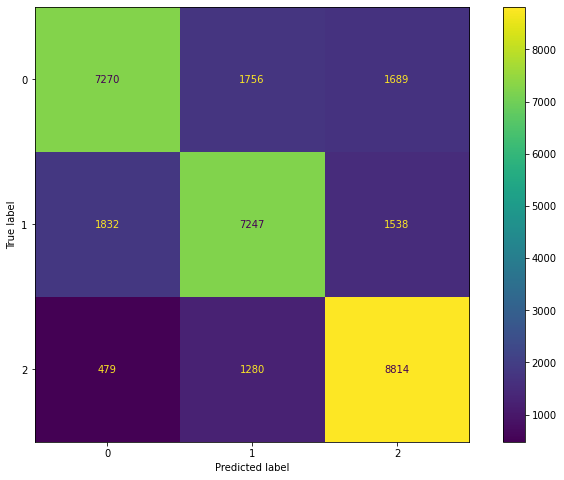

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     10715
           1       0.70      0.68      0.69     10617
           2       0.73      0.83      0.78     10573

    accuracy                           0.73     31905
   macro avg       0.73      0.73      0.73     31905
weighted avg       0.73      0.73      0.73     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.8793488974408751                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,ABC)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_bagging.sav'
pickle.dump(BC, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card


# **HistGradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
HBC=HistGradientBoostingClassifier()
HBC.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [ ]:
y_pred=HBC.predict(X_test)
y_proba=HBC.predict_proba(X_test)

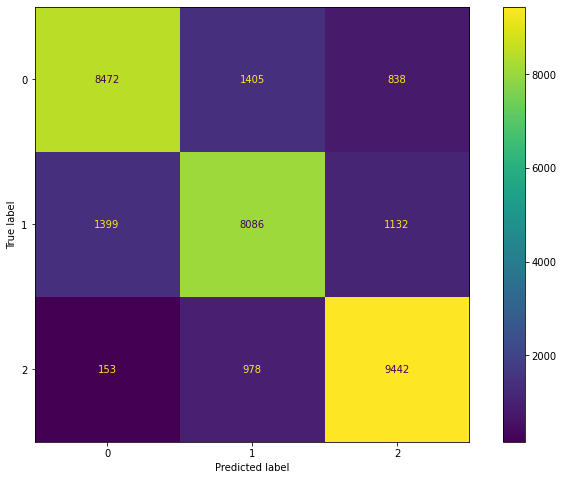

*************    The Detailed Classification Report is as below:          ***********************
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     10715
           1       0.77      0.76      0.77     10617
           2       0.83      0.89      0.86     10573

    accuracy                           0.81     31905
   macro avg       0.81      0.82      0.81     31905
weighted avg       0.82      0.81      0.81     31905

*************************************************************************************************
*************   The ROC AUC Score Using One vs All approach is as  below: ***********************
                0.9473762065781259                                                         
*************************************************************************************************


In [ ]:
test_stats(X_test,y_pred,y_proba,y_test,HBC)

In [ ]:
# save the model to disk
%cd /content/drive/MyDrive/Credit_Card/
filename = 'finalized_model_HBC.sav'
pickle.dump(HBC, open(filename, 'wb'))

/content/drive/MyDrive/Credit_Card
